<a href="https://colab.research.google.com/github/AllanMartinsRosa/Machine-Learning-Introducao-a-algoritmos-nao-supervisionados/blob/master/Fimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [3]:
uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
filmes.generos.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: generos, dtype: object

In [5]:
generos = filmes.generos.str.get_dummies()
generos.head()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [0]:
from sklearn.cluster import KMeans

In [8]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print('Grupos {}'.format(modelo.labels_))
print(f'Grupos {modelo.labels_}')


Grupos [0 0 1 ... 1 0 1]
Grupos [0 0 1 ... 1 0 1]


In [9]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.76524722  1.62835849  1.2599783   1.14745311 -0.138913
  -0.31466304 -0.21094676 -0.58192102  0.99257383 -0.09492563 -0.2368503
   0.57077121  0.18119948 -0.15759062 -0.27927498  0.68190324 -0.24921741
  -0.05501881 -0.05355914]
 [ 0.03993146 -0.31636969 -0.2963887  -0.21897305 -0.17972735  0.22720237
  -0.35945646  0.14426677  0.1123672  -0.17945791 -0.08944369 -0.10180587
  -0.11206549  0.02698915 -0.21929897  0.19787472 -0.19155379 -0.48604629
   0.06722863  0.03348553]
 [-0.05917995  0.29102265 -0.27429704 -0.23682097 -0.26236322 -0.45542447
   1.04123205 -0.21552637  0.0827345  -0.17006198  0.26906826  0.38355009
  -0.07675917 -0.17273604  0.61460884 -0.30164879  0.04504965  1.30215218
  -0

In [10]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.765247,1.628358,1.259978,1.147453,-0.138913,-0.314663,-0.210947,-0.581921,0.992574,-0.094926,-0.236850,0.570771,0.181199,-0.157591,-0.279275,0.681903,-0.249217,-0.055019,-0.053559
1,0.039931,-0.316370,-0.296389,-0.218973,-0.179727,0.227202,-0.359456,0.144267,0.112367,-0.179458,-0.089444,-0.101806,-0.112065,0.026989,-0.219299,0.197875,-0.191554,-0.486046,0.067229,0.033486
2,-0.059180,0.291023,-0.274297,-0.236821,-0.262363,-0.455424,1.041232,-0.215526,0.082735,-0.170062,0.269068,0.383550,-0.076759,-0.172736,0.614609,-0.301649,0.045050,1.302152,-0.126409,-0.047267


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01535fbdd8>,
      dtype=object)

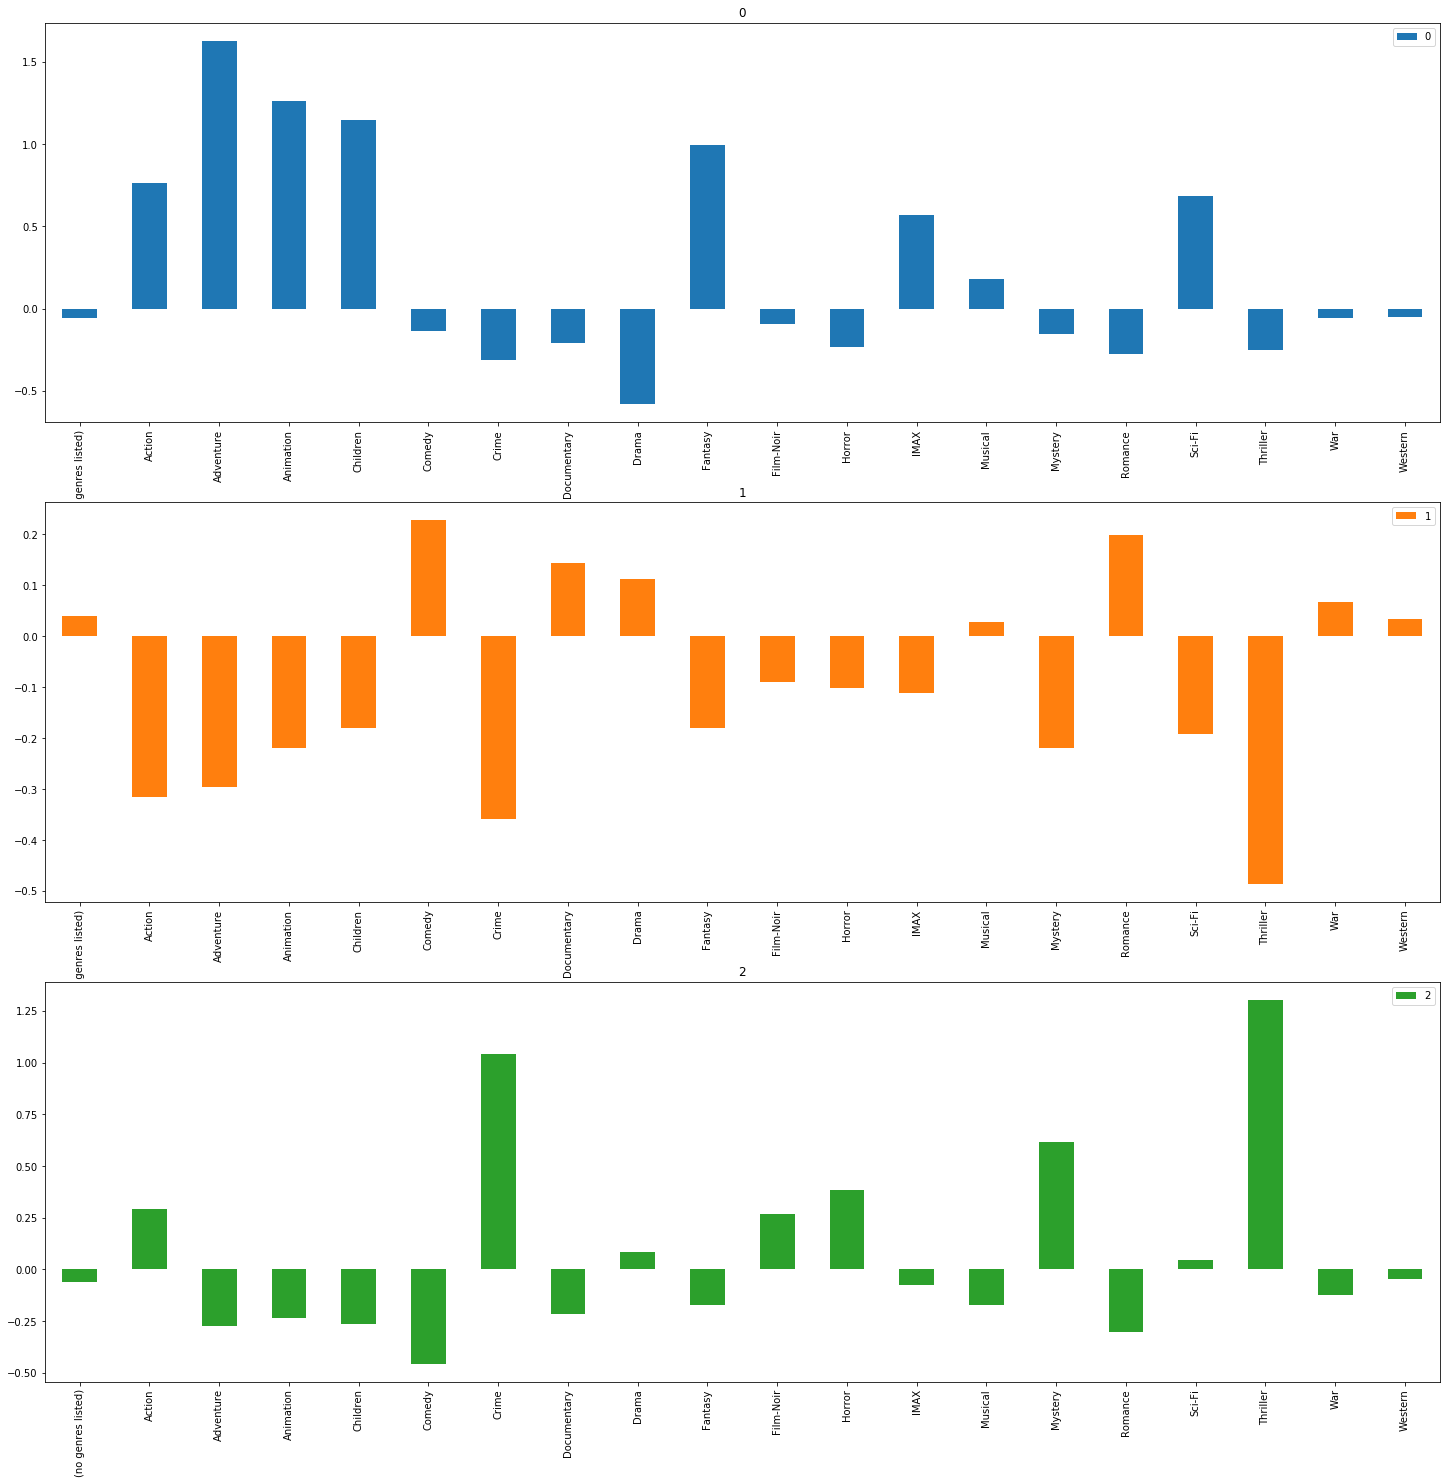

In [11]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False, )

In [12]:
grupo = 0
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7919,95377,One Man Band (2005),Animation|Comedy|Musical,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9214,151769,Three from Prostokvashino (1978),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2984,3997,Dungeons & Dragons (2000),Action|Adventure|Comedy|Fantasy,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4439,6557,Born to Be Wild (1995),Adventure|Children|Comedy|Drama,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8137,101864,Oblivion (2013),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6112,42734,Hoodwinked! (2005),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6492,53140,"Librarian: Quest for the Spear, The (2004)",Action|Adventure|Comedy|Fantasy|Romance,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2316,3070,Adventures of Buckaroo Banzai Across the 8th D...,Adventure|Comedy|Sci-Fi,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2902,3889,Highlander: Endgame (Highlander IV) (2000),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  1.4135987,  62.861626 ],
       [-21.441467 , -34.344704 ],
       [ 11.164435 , -22.340158 ],
       ...,
       [ 15.398254 ,  10.842674 ],
       [ 63.79867  ,   4.659328 ],
       [-30.890415 ,  23.245    ]], dtype=float32)

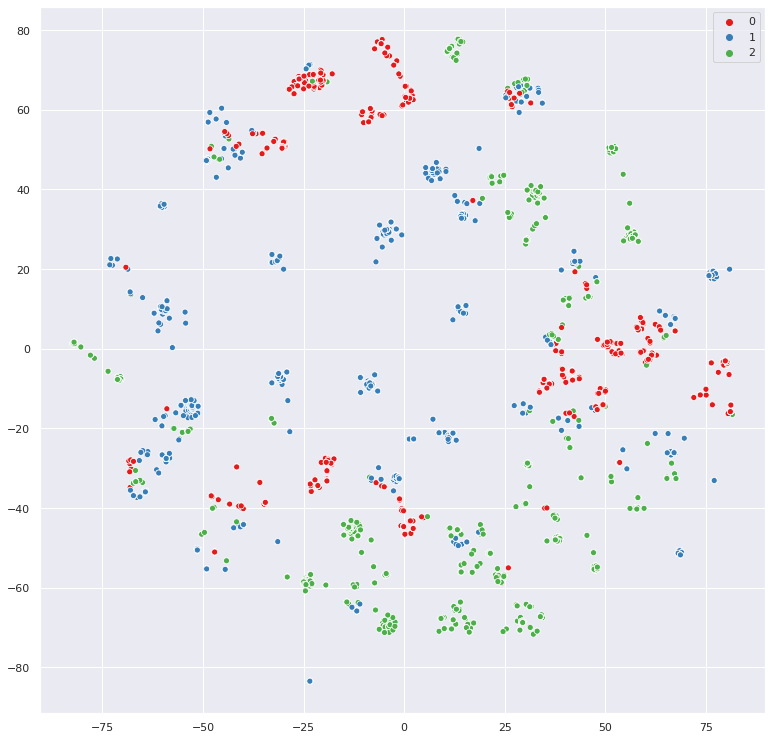

In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visualizacao[:, 0],  y=visualizacao[:,1], hue=modelo.labels_, palette=sns.color_palette('Set1',3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f014bf8e6a0>,
      dtype=object)

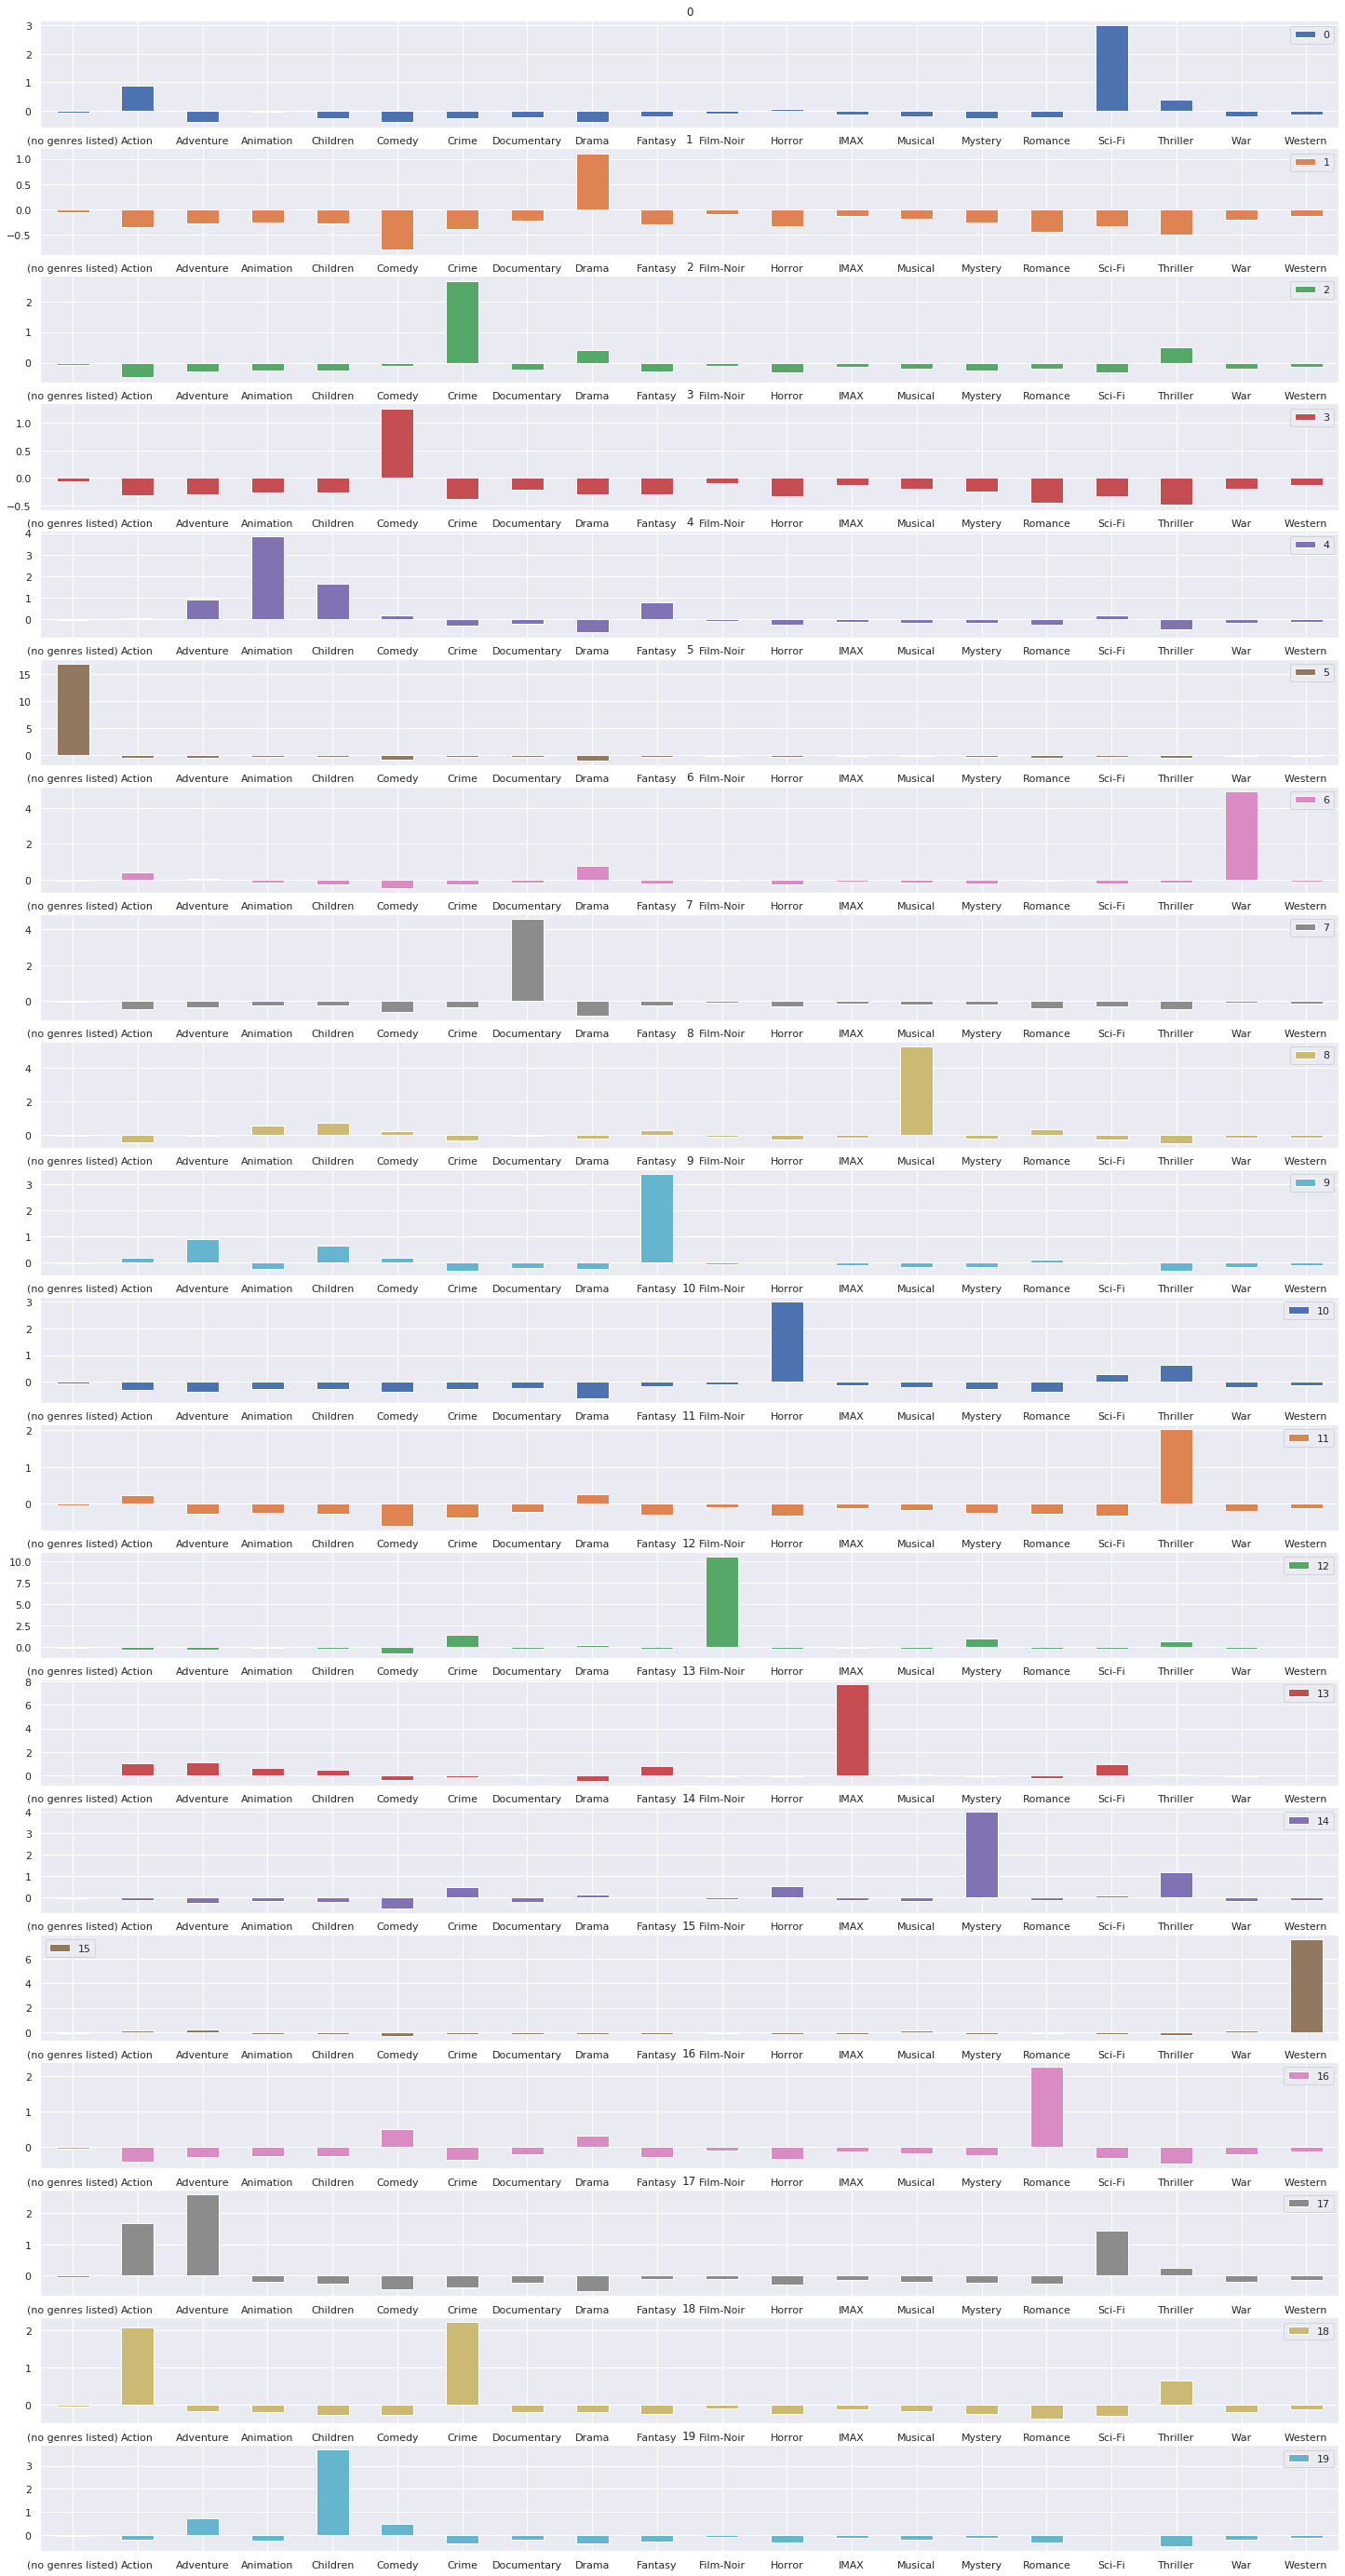

In [20]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [21]:
grupo = 2
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3955,5573,Stealing Harvard (2002),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5006,7748,Pierrot le fou (1965),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6683,58078,"Air I Breathe, The (2007)",Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
7304,76173,Micmacs (Micmacs à tire-larigot) (2009),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3836,5384,I Want to Live! (1958),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2817,3765,"Hot Spot, The (1990)",Crime|Drama|Romance,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3383,4602,Harlem Nights (1989),Comedy|Crime|Romance,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3588,4919,Subway (1985),Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
4460,6584,"What's Up, Tiger Lily? (1966)",Adventure|Comedy|Crime|Thriller,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4911,7364,Intermission (2003),Comedy|Crime|Drama,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [25]:
print(kmeans(20, generos_escalados))
print(kmeans(3, generos_escalados))

[20, 54181.6614658485]
[3, 167937.30096417302]


In [31]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179451.5778143162],
 [3, 166137.8397149041],
 [4, 157157.57838177367],
 [5, 146317.89989495755],
 [6, 137759.30594770735],
 [7, 128615.40685548654],
 [8, 120400.55319671832],
 [9, 111928.10842757148],
 [10, 103517.44674505078],
 [11, 95623.66913688123],
 [12, 87093.34871130677],
 [13, 79610.75567694854],
 [14, 75904.00603566194],
 [15, 68696.82104140433],
 [16, 67137.88196470673],
 [17, 64648.97474617347],
 [18, 60213.32298505898],
 [19, 57432.13657778629],
 [20, 56167.54864074006],
 [21, 53659.63782315882],
 [22, 51290.47470786665],
 [23, 50741.95977497848],
 [24, 49136.13477333633],
 [25, 48100.40286233066],
 [26, 46605.40482066694],
 [27, 46524.851240895376],
 [28, 44422.57238059545],
 [29, 44061.02467701146],
 [30, 43101.293851786126],
 [31, 41331.87090581319],
 [32, 41114.481075927666],
 [33, 40571.99942031345],
 [34, 39447.40498167735],
 [35, 38471.37313347908],
 [36, 37620.28043535967],
 [37, 37646.166799102066],
 [38, 36803.32988464191],
 [39, 36350.5380356

In [0]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])


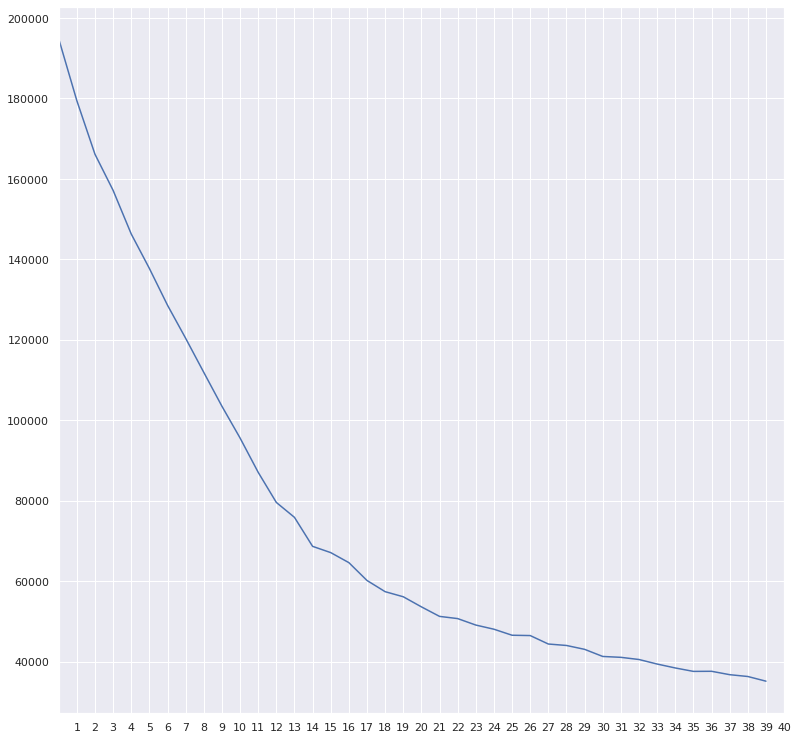

In [36]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f014a83a630>,
      dtype=object)

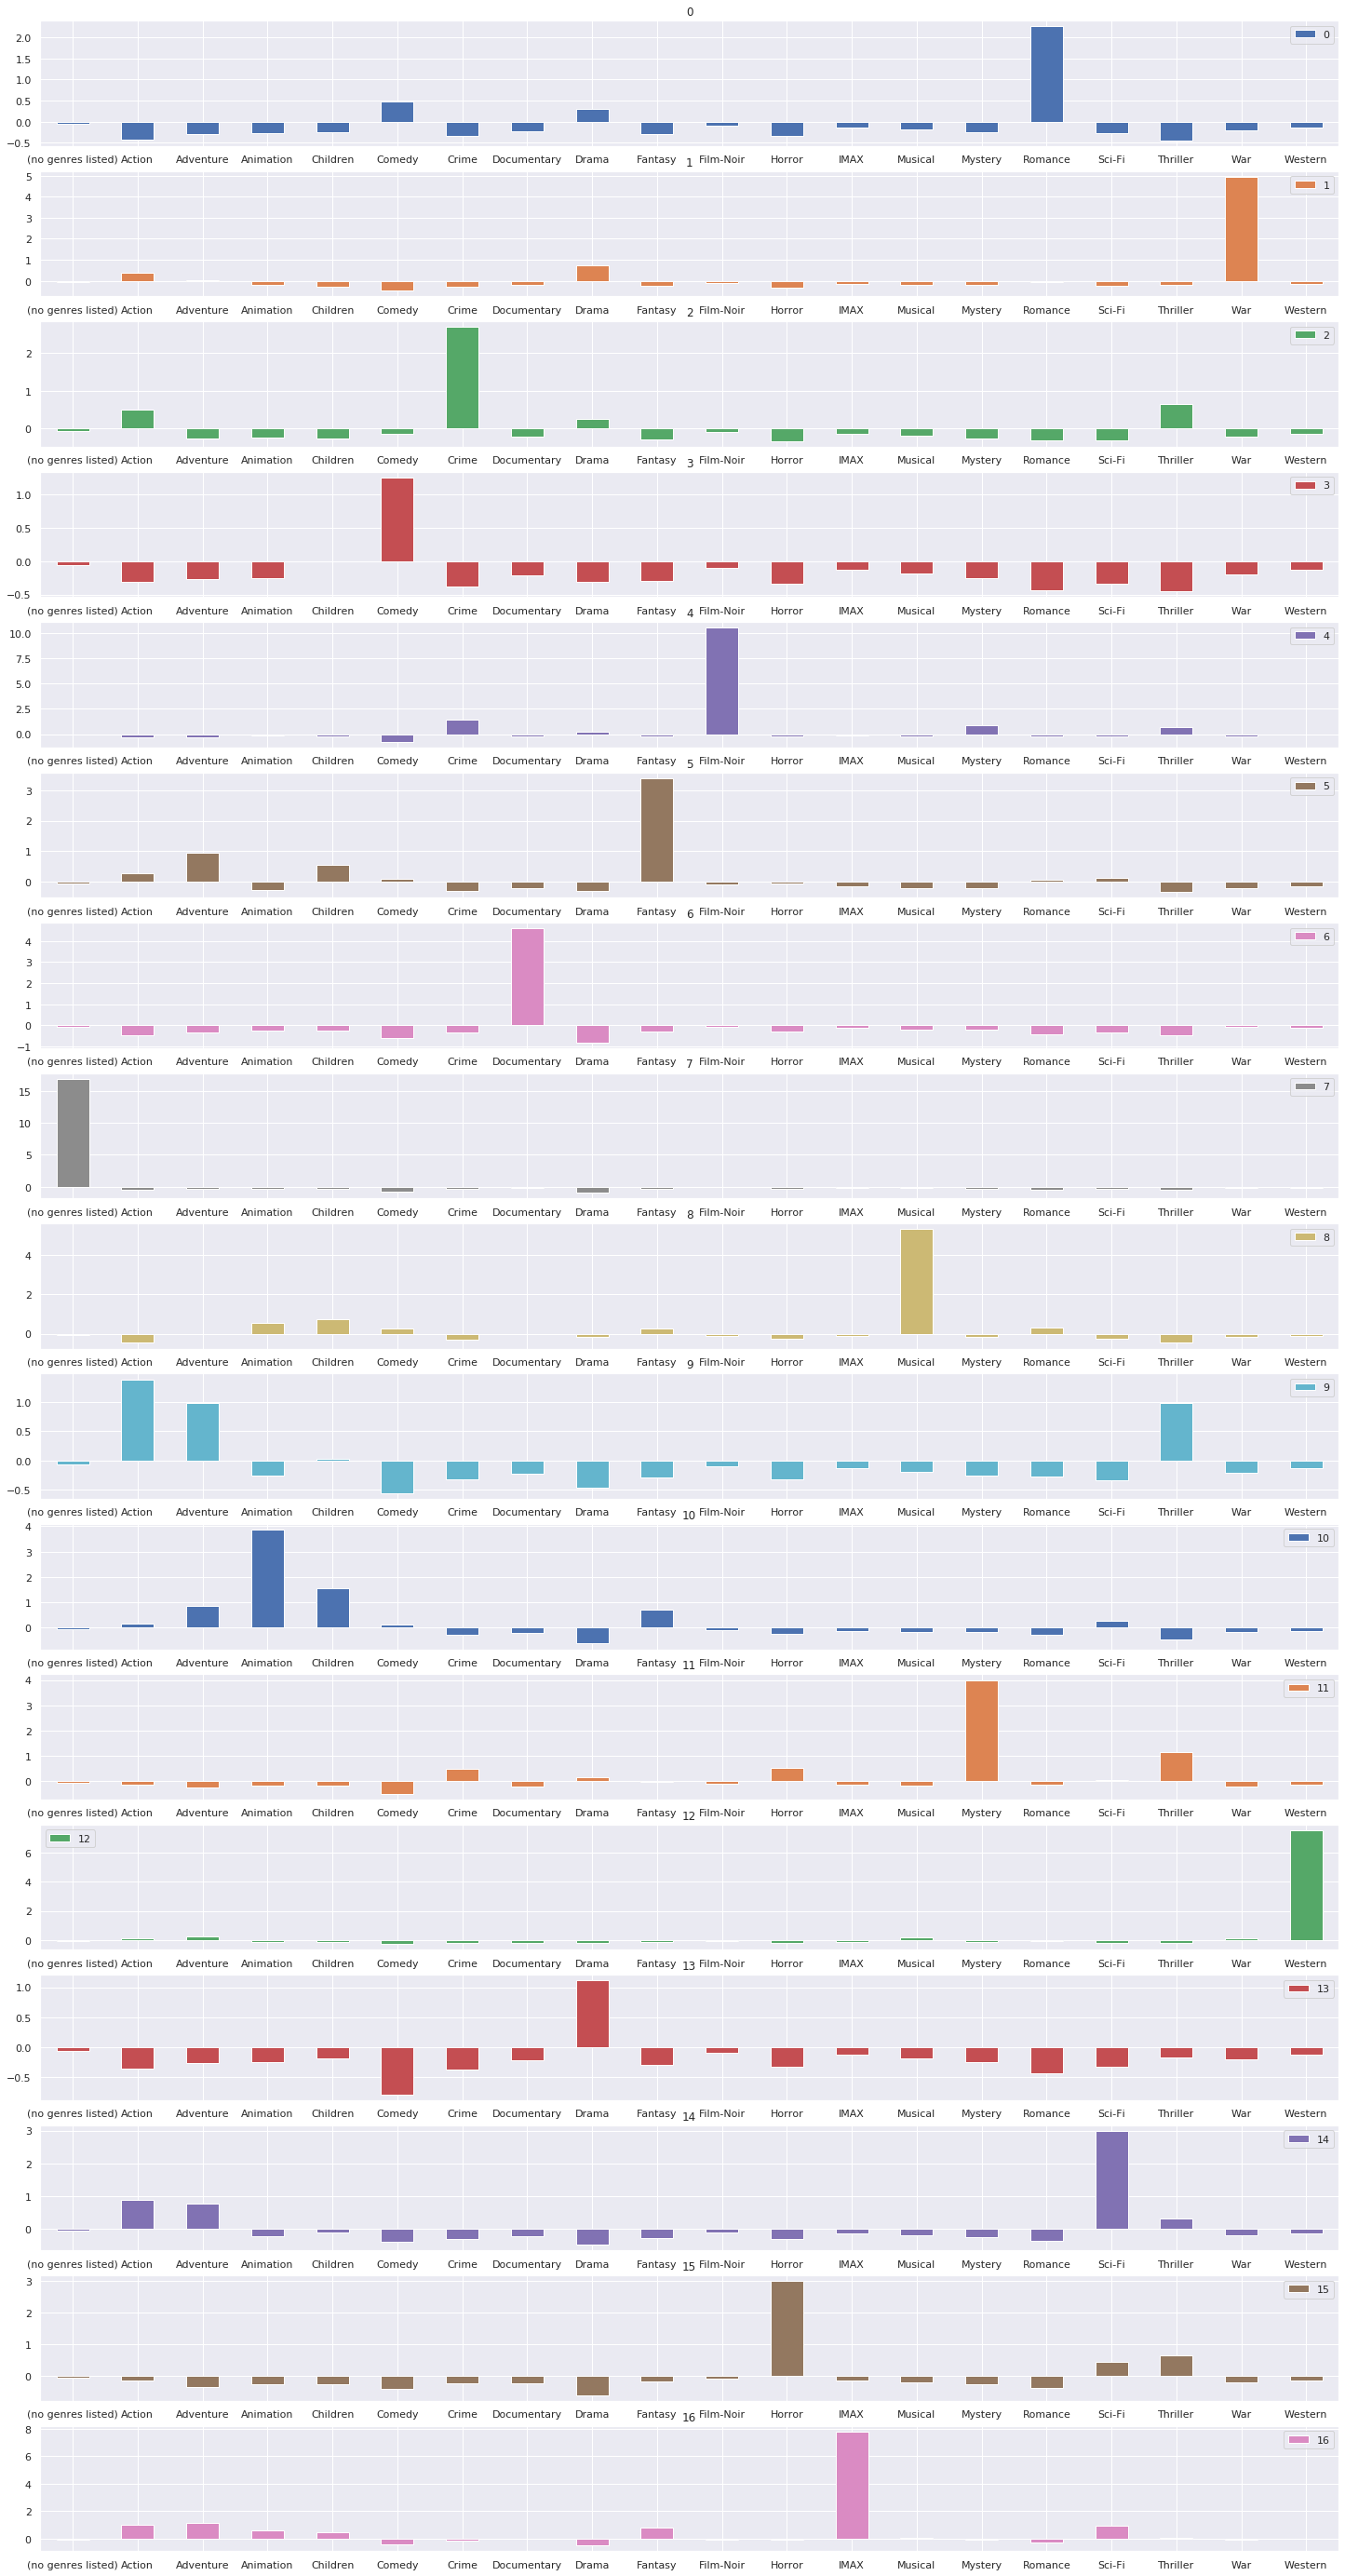

In [37]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [38]:
grupo = 1
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
726,946,To Be or Not to Be (1942),Comedy|Drama|War,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2303,3053,"Messenger: The Story of Joan of Arc, The (1999)",Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3305,4473,Bat*21 (1988),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5763,31150,Wizards (1977),Animation|Fantasy|Sci-Fi|War,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
7021,68486,Red Cliff Part II (Chi Bi Xia: Jue Zhan Tian X...,Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3724,5152,We Were Soldiers (2002),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4448,6567,Buffalo Soldiers (2001),Comedy|Crime|Drama|War,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4068,5799,Exodus (1960),Drama|Romance|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5464,26158,Closely Watched Trains (Ostre sledované vlaky)...,Comedy|Drama|War,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7652,88327,"New One-Armed Swordsman, The (Xin du bi dao) (...",Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [41]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  0.7470942,  67.11696  ],
       [-52.023533 ,   3.795573 ],
       [ 15.260703 ,  -3.929649 ],
       ...,
       [-13.40794  , -24.147867 ],
       [-34.003002 ,  29.406498 ],
       [ -2.1898742,  15.718824 ]], dtype=float32)

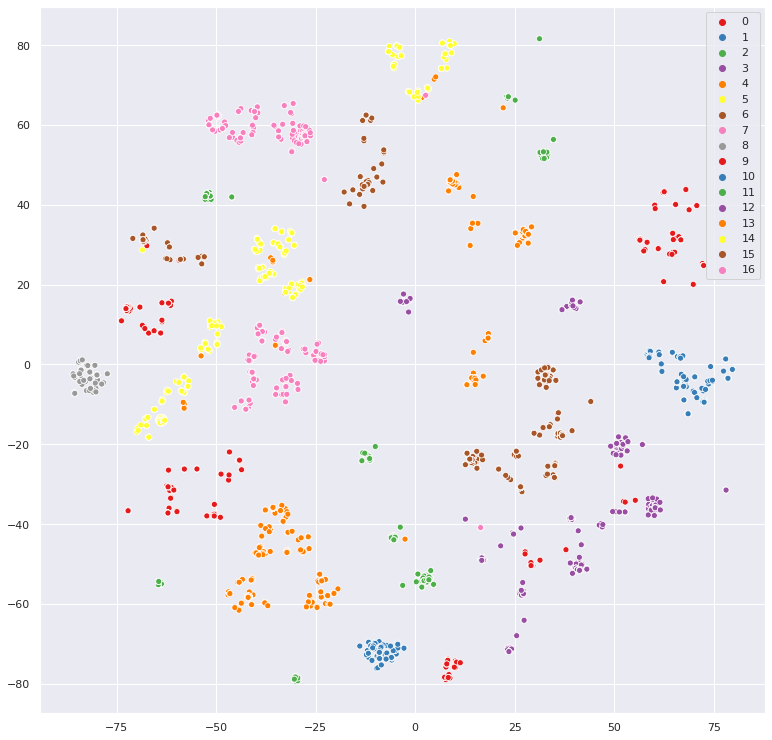

In [45]:
sns.scatterplot(x=visualizacao[:, 0],  y=visualizacao[:,1], hue=grupos, palette=sns.color_palette('Set1',17))

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0149c68978>,
      dtype=object)

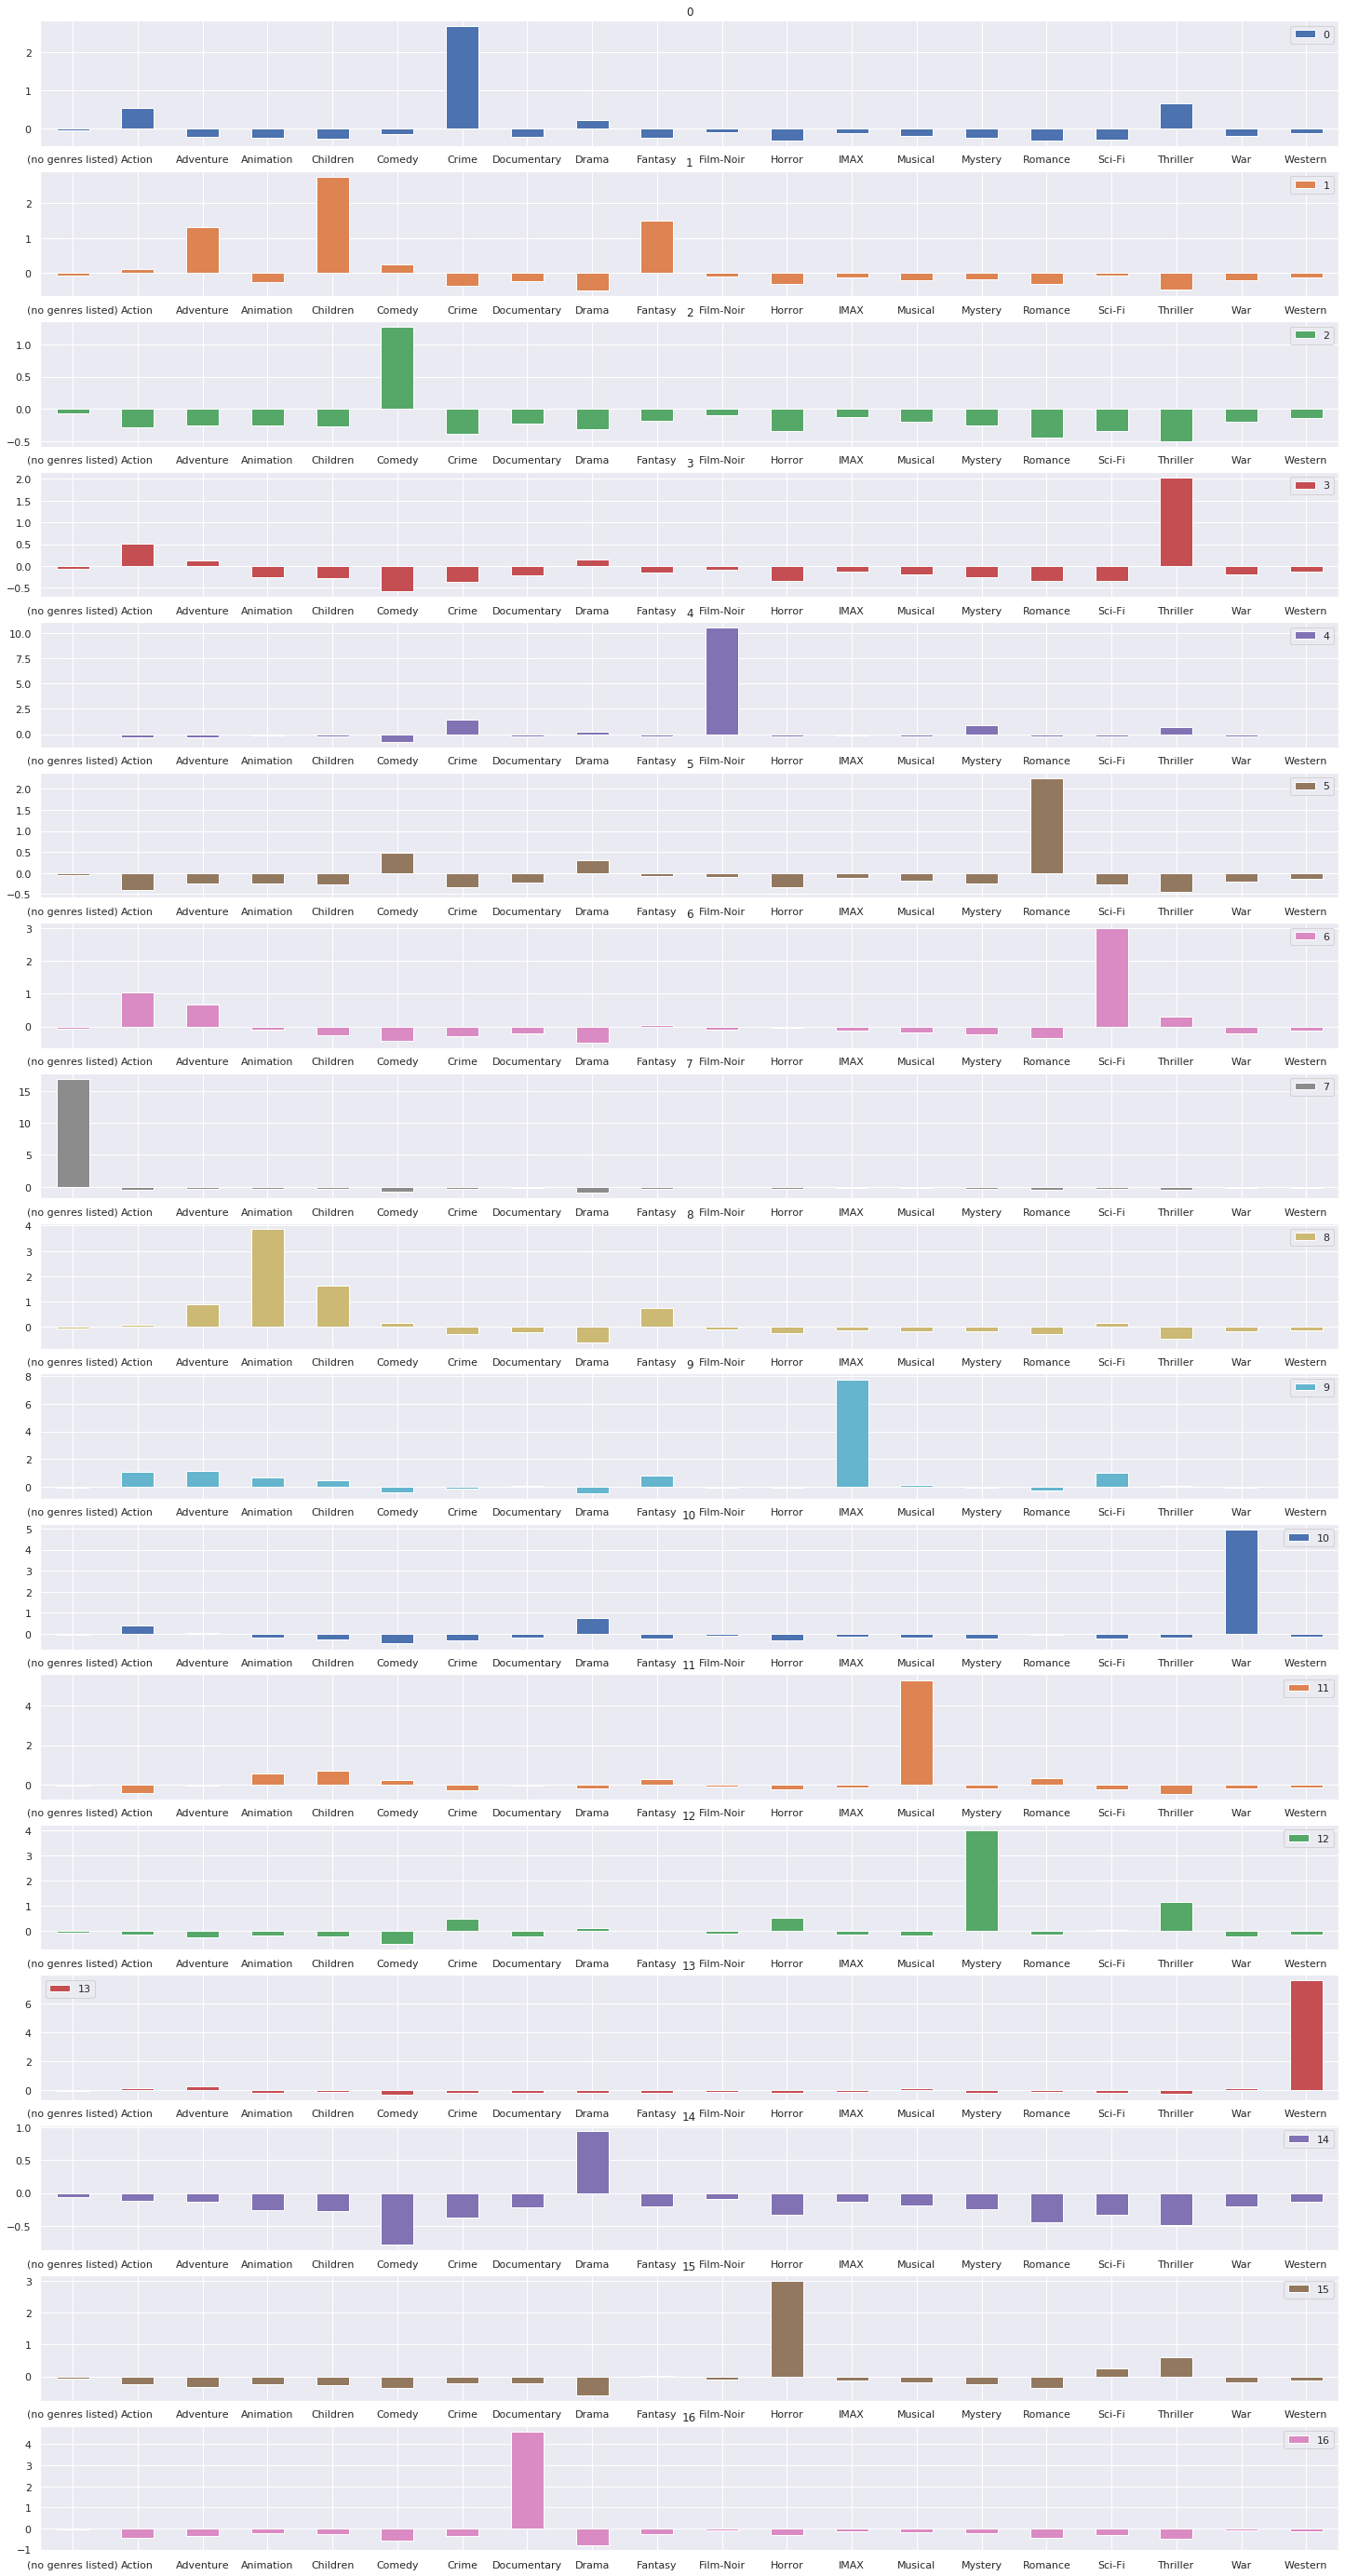

In [47]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [49]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        , 14.        ,  2.41424923,  2.        ],
       [ 3.        , 17.        ,  2.74828401,  3.        ],
       [ 5.        , 18.        ,  2.8838004 ,  4.        ],
       [ 0.        , 19.        ,  3.3881957 ,  5.        ],
       [15.        , 20.        ,  3.85572915,  6.        ],
       [ 6.        , 21.        ,  3.90578682,  7.        ],
       [ 1.        , 22.        ,  3.95286528,  8.        ],
       [ 8.        , 23.        ,  4.36742201,  9.        ],
       [12.        , 24.        ,  4.58958902, 10.        ],
       [16.        , 25.        ,  5.14664471, 11.        ],
       [10.        , 26.        ,  5.22051561, 12.        ],
       [11.        , 27.        ,  5.81656082, 13.        ],
       [13.        , 28.        ,  7.84731311, 14.        ],
       [ 9.        , 29.        ,  8.29977899, 15.        ],
       [ 4.        , 30.        , 10.81682381, 16.        ],
       [ 7.        , 31.        , 17.06285365, 17.        ]])

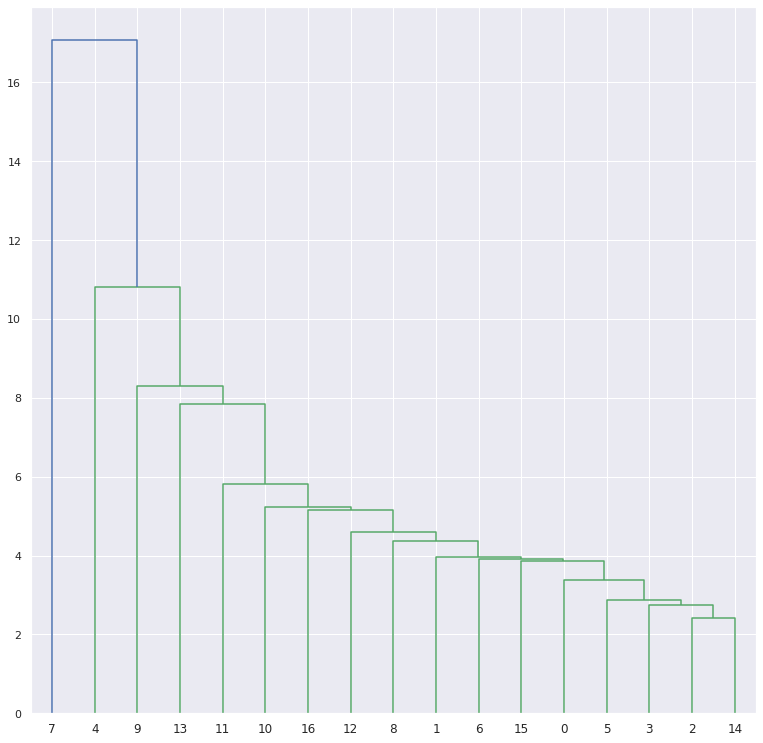

In [50]:
dendrograma = dendrogram(matriz_de_distancia)